In [17]:
%%bash
pip install --upgrade git+https://github.com/nexxt-intelligence/DeepMoji@tf-keras
pip install wordcloud
wget -nc -qq https://www.wfonts.com/download/data/2016/04/23/symbola/symbola.zip
unzip -qqo symbola.zip

  Cloning https://github.com/nexxt-intelligence/DeepMoji (to revision tf-keras) to /tmp/pip-req-build-z5tc1u_h


  Running command git clone -q https://github.com/nexxt-intelligence/DeepMoji /tmp/pip-req-build-z5tc1u_h
  Running command git checkout -b tf-keras --track origin/tf-keras
  Switched to a new branch 'tf-keras'
  Branch 'tf-keras' set up to track remote branch 'tf-keras' from 'origin'.


In [18]:
from deepmoji import DeepMoji
import string
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# Set figure size for EmojiCloud
plt.rcParams["figure.figsize"] = (20, 20)

In [19]:
# Instantiate DeepMoji model
emoji_model = DeepMoji()

In [48]:
# Wrapper class to generate EmojiCloud

class EmojiCloud:
    def __init__(self,
                 font_path='Symbola.ttf',
                 color='yellow'):
        self.font_path = font_path
        self.color = color
        self.word_cloud = self.initialize_wordcloud()
        self.emoji_probability = None

    def initialize_wordcloud(self):
        word_cloud = WordCloud(font_path=self.font_path,
                               width=2000,
                               height=1000,
                               background_color='black',
                               random_state=42,
                               collocations=False)
        return word_cloud

    def color_func(self, word, font_size, position, orientation, random_state=None,
                   **kwargs):
        hue_saturation = {
            'yellow': '42, 88%',
            'blue': '194, 49%',
            'green': '159, 42%',
            'grey': '45, 2%'
        }.get(self.color)

        current_emoji_probability = self.emoji_probability[word]
        if current_emoji_probability >= 0.20:
            opacity = 50
        else:
            opacity = 75 - current_emoji_probability/0.2 * 5
        return f"hsl({hue_saturation},{opacity}%)"

    def generate(self, emojis):
        emoji_frequencies = Counter(emojis)
        total_count = len(emojis)
        self.emoji_probability = {emoji: count/total_count for emoji, count in emoji_frequencies.items()}
        wc = self.word_cloud.generate_from_frequencies(emoji_frequencies)
        plt.imshow(wc.recolor(color_func=self.color_func, random_state=42),
                   interpolation="bilinear")
        plt.axis("off")

In [15]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

df = pd.read_excel('/content/testing.xlsx')

print("Column headings:")
print(df.columns)

Column headings:
Index(['Unnamed: 0', 'created_at', 'id_str', 'conversation_id_str',
       'full_text', 'twitter_lang', 'favorited', 'retweeted', 'retweet_count',
       'favorite_count', 'reply_count', 'quote_count', 'quoted_status_id_str',
       'quoted_status_short_url', 'quoted_status_expand_url', 'user_id_str',
       'user_name', 'user_full_name', 'user_verified',
       'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'hashtags',
       'mentions', 'urls', 'media', 'preprocessed_created_at',
       'preprocessed_data', 'emoji_list', 'emoticons_list', 'filename',
       'data_source', 'lang', 'score', 'langTb', 'lang_langdetect',
       'preprocessed_data_without_hashtags', 'Unnamed: 36', 'Unnamed: 37',
       'Sentiment_Score'],
      dtype='object')


In [ ]:
#checking for english tweets
data_english = df[df['lang']=='en']
data_english.emoji_list.head(30)

In [ ]:
#list the emojis
emoji_eng1 = []
for i in data_english.emoji_list:
    if i != "[]":
      emoji_eng1.append(i)
emoji_eng1

In [ ]:
#list the emojis for the whole emoji column
emoji = []
for i in df.emoji_list:
    if i != "['']":
      emoji.append(i)
emoji

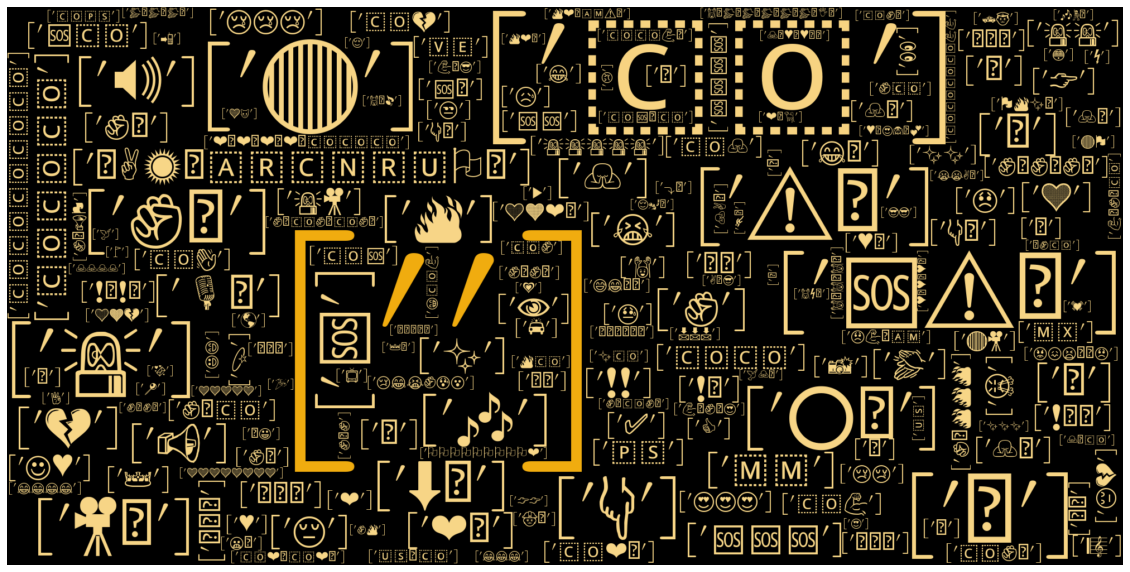

In [87]:
#Creating emoji_cloud for english
emoji_cloud = EmojiCloud(font_path='./Symbola.ttf')
emoji_cloud.generate(emoji_eng1)

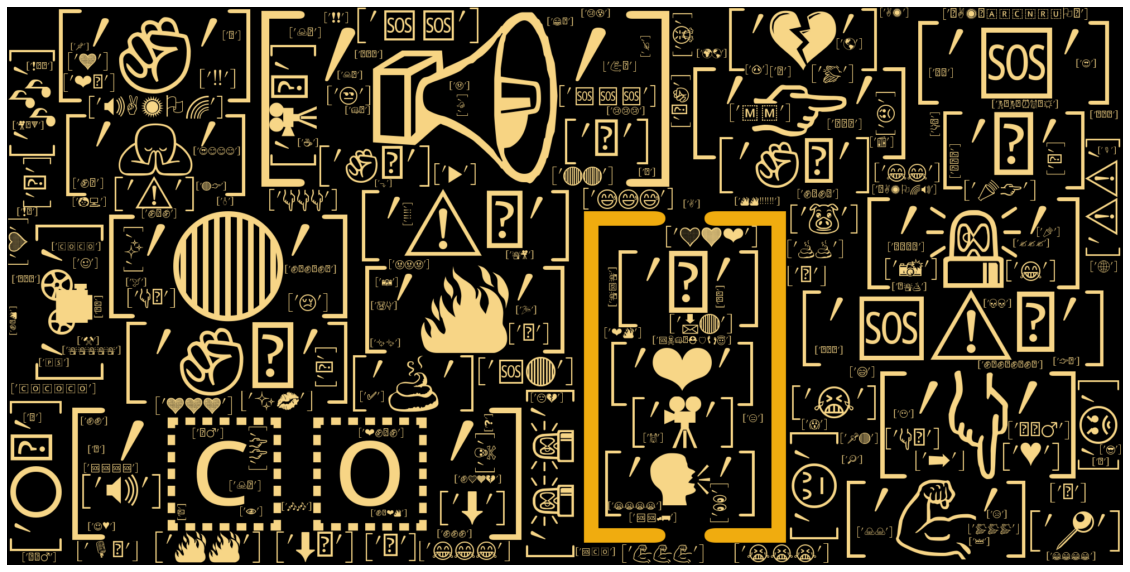

In [86]:
#Creating emoji_cloud for the whole emojis
emoji_cloud = EmojiCloud(font_path='./Symbola.ttf')
emoji_cloud.generate(emoji)